In [2]:
import calculate_mobilityscores

In [3]:
# import statements
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# script parameters
genomes_per_species = 10 # minimal number of genomes per species
threshold_accessory = 0.9 # fraction of genomes per species an orthogroup can be present in at max. to be cosidered accessory
project_path = Path().resolve().parent
path_genomes = project_path / "data" / "genomes_metadata.csv"
path_pangenome = project_path / "data" / "pangenome.tsv"
output_path = project_path / "data" / "mobility_frame.csv"

# import data
genomes = pd.read_csv(path_genomes).loc[:,'genome':'gtdb_species']
pangenome = pd.read_csv(path_pangenome, delimiter="\t", header=None)
pangenome.columns = ["gene", "genome", "orthogroup"]


In [4]:
genomes_filtered = calculate_mobilityscores.filter_species(genomes=genomes, filter_threshold=genomes_per_species)
full = pd.merge(genomes_filtered, pangenome, on='genome', how='left')
mobility_frame = calculate_mobilityscores.generate_mobility_frame(full)
mobility_frame.to_csv(output_path)


In [5]:
mobility_frame

,orthogroup,species_count,genomes_count,accessory_count
0,F00001_1,0.062500,0.011364,16.0
1,F00002_1,1.000000,0.038462,1.0
2,F00003_1,0.076923,0.016667,11.0
3,F00004_1,0.026316,0.003831,38.0
4,F00005_1,0.015152,0.000572,29.0
...,...,...,...,...
52262,F67384_1,1.000000,0.333333,1.0
52263,F67385_1,1.000000,0.333333,1.0
52264,F67386_1,1.000000,0.500000,1.0
52265,F67387_1,1.000000,1.000000,1.0


In [7]:
import visualize_mobility_score

In [8]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# script parameters
project_path = Path().resolve().parent
path_mobility = project_path / "data" / "mobility_frame.csv"
path_pangenome = project_path / "data" / "pangenome.tsv"

genome1 = "GCA_000006785.2"
genome2 = "GCA_002076955.1"
genome3 = "GCA_002073835.2"
genome4 = "GCA_002073435.2"
genome5 = "GCA_002073355.2"

# import data
mobility_frame = pd.read_csv(path_mobility)
pangenome = pd.read_csv(path_pangenome, delimiter="\t", header=None)
pangenome.columns = ["gene", "genome", "orthogroup"]

In [9]:
full_order = visualize_mobility_score.determine_order(pangenome)

In [10]:
full_order

,contig,order,gene,genome,orthogroup
0,CP002034.1,1719,CP002034.1_1719,GCA_000143435.1,F00691_06
1,AEBA01000134.1,40,AEBA01000134.1_40,GCA_000179475.1,F00691_06
2,NBEP01000018.1,44,NBEP01000018.1_44,GCA_002079655.1,F00691_06
3,DONQ01000011.1,12,DONQ01000011.1_12,GCA_003513805.1,F00691_06
4,AFMN01000001.1,591,AFMN01000001.1_591,GCA_000215465.2,F00691_06
...,...,...,...,...,...
10096366,CABGJU010000006.1,8,CABGJU010000006.1_8,GCA_902159415.1,F05974_2
10096367,CABGJU010000006.1,9,CABGJU010000006.1_9,GCA_902159415.1,F10537_1
10096368,CABGJU010000007.1,1,CABGJU010000007.1_1,GCA_902159415.1,F00820_1
10096369,CABGJU010000009.1,1,CABGJU010000009.1_1,GCA_902159415.1,F21391_1


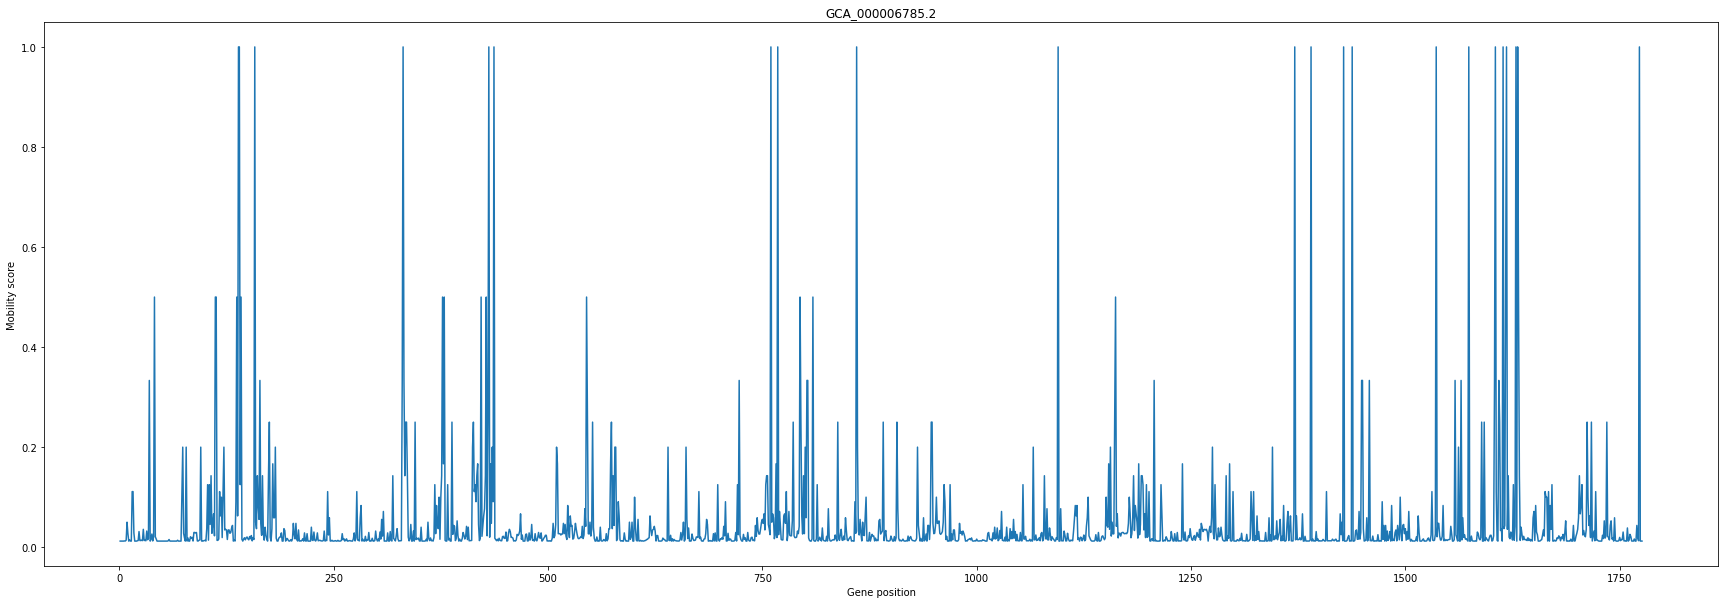

In [11]:
visualize_mobility_score.mobility_plot(genome=genome1, order=full_order, method="species_count", n=1)

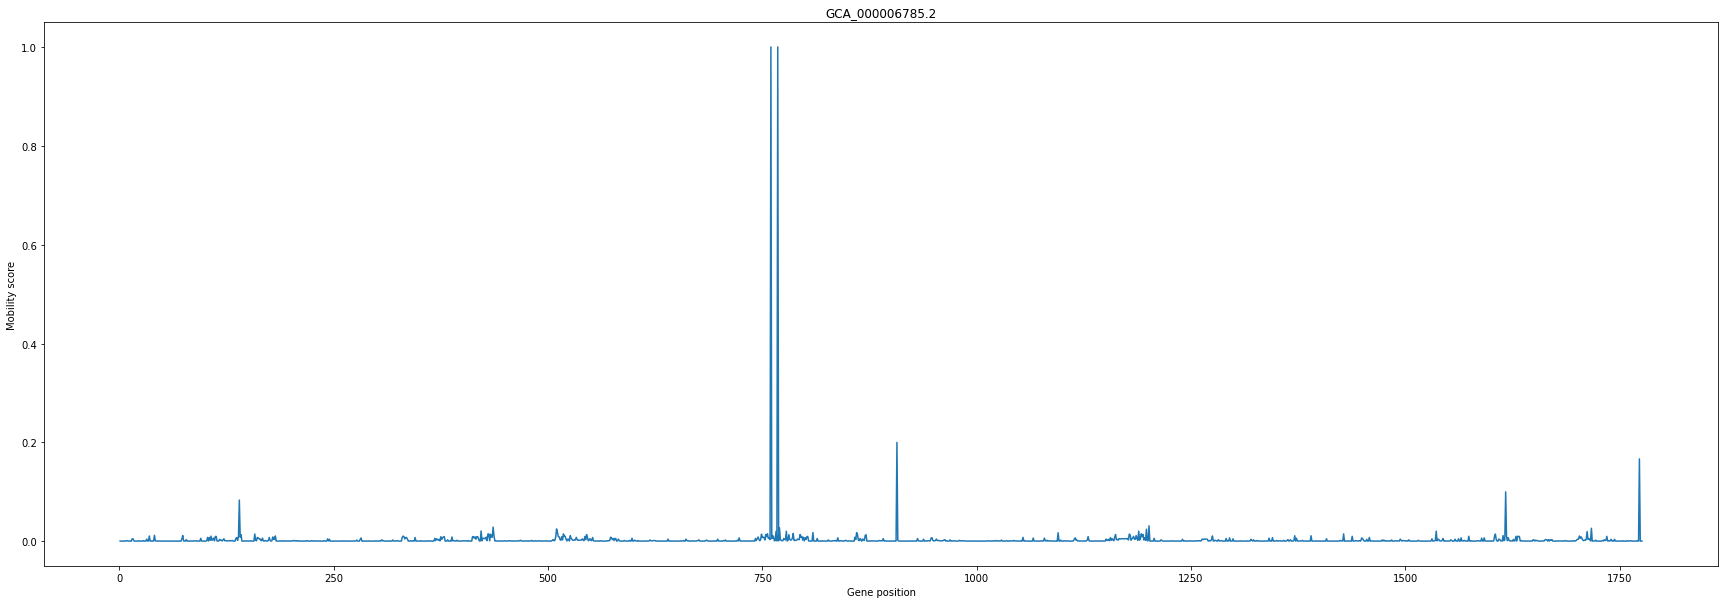

In [12]:
visualize_mobility_score.mobility_plot(genome=genome1, order=full_order, method="genomes_count", n=1)

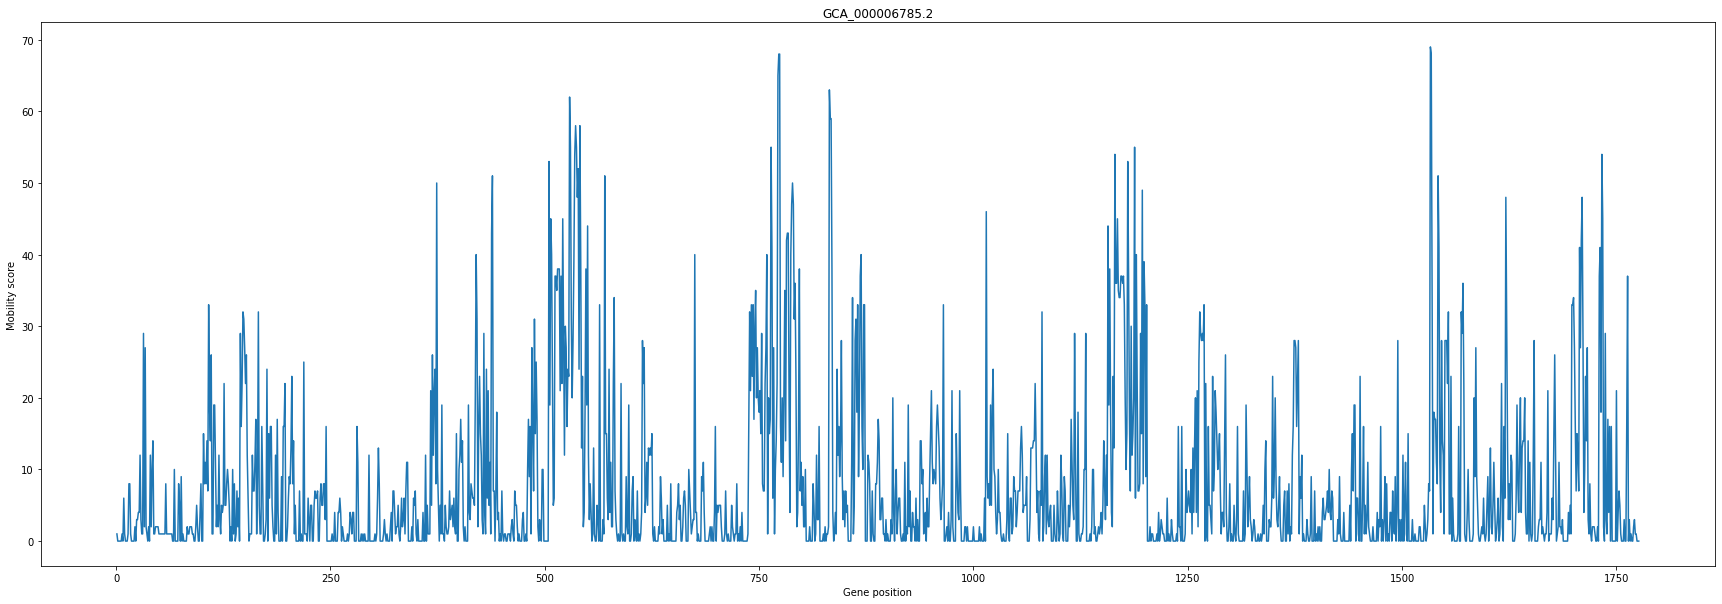

In [13]:
visualize_mobility_score.mobility_plot(genome=genome1, order=full_order, method="accessory_count", n=1)

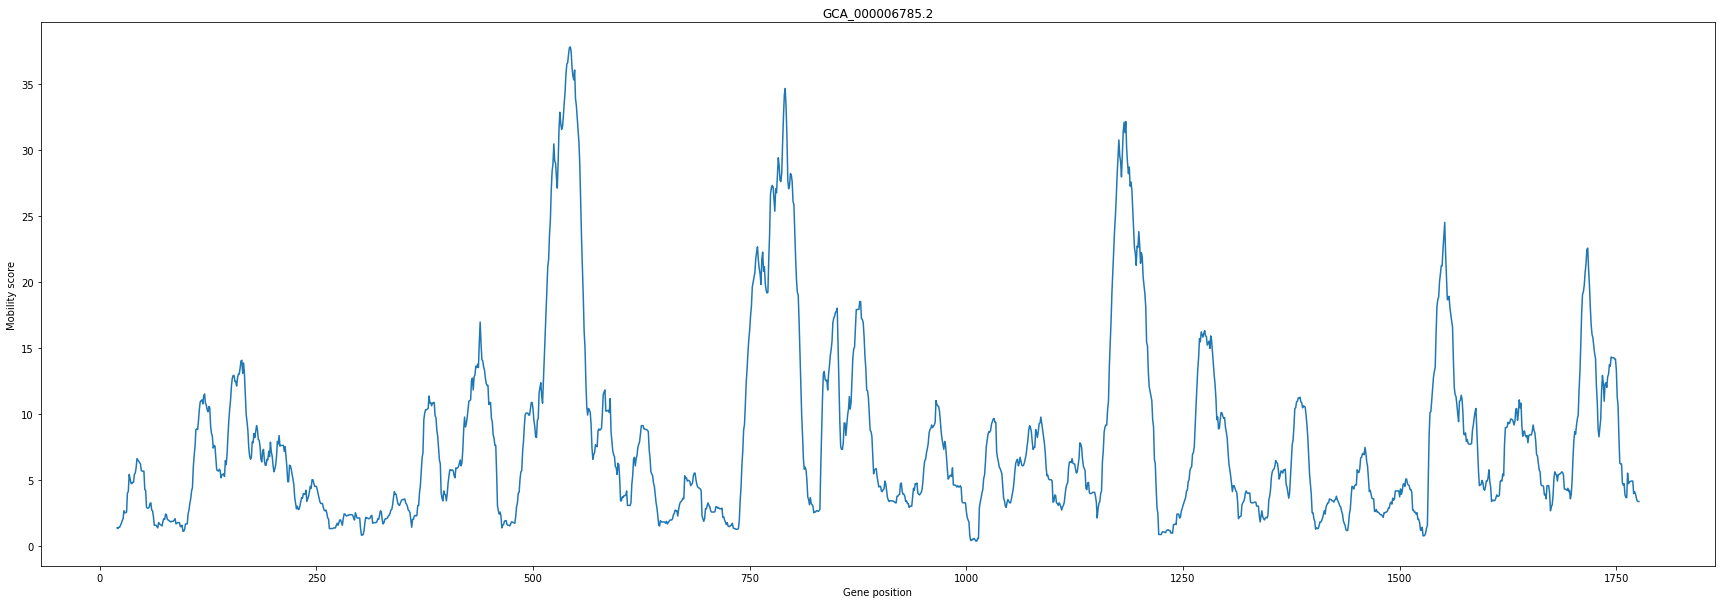

In [14]:
visualize_mobility_score.mobility_plot(genome=genome1, order=full_order, method="accessory_count", n=20)

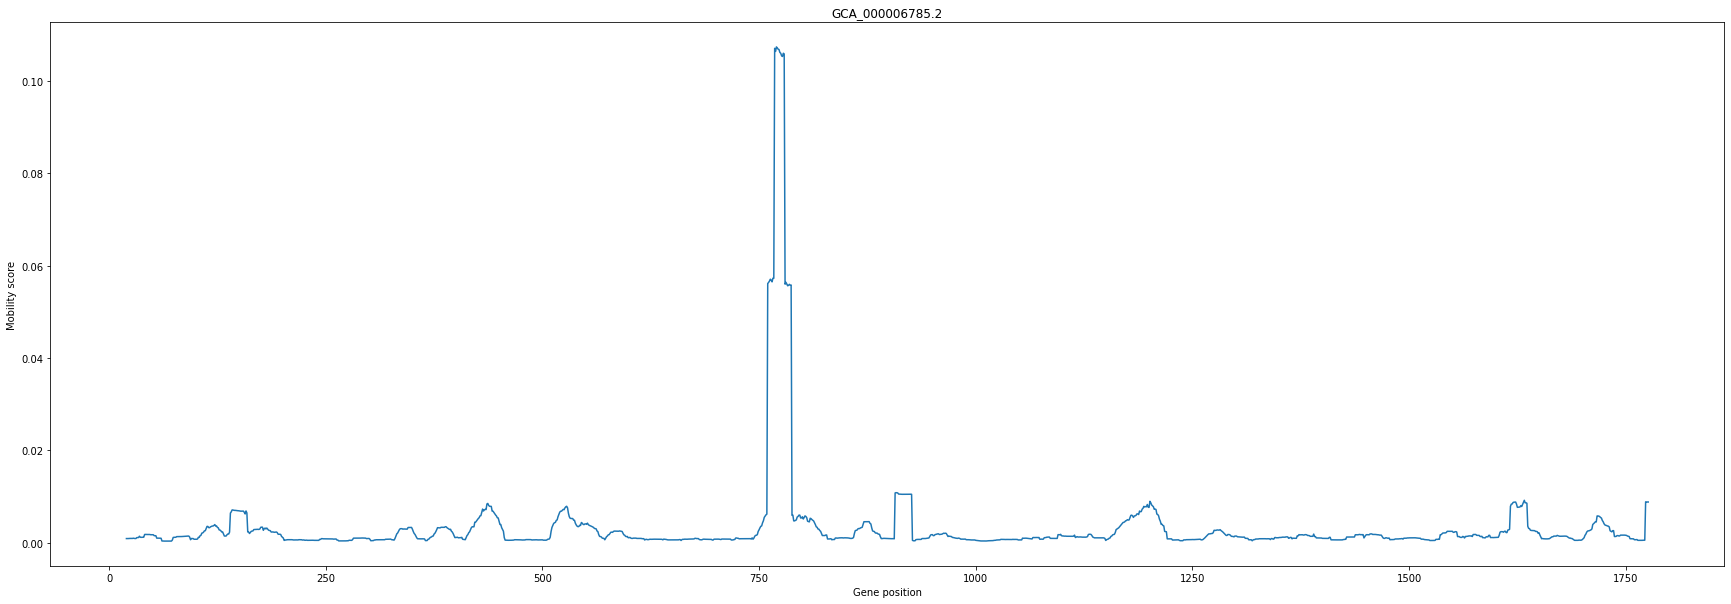

In [15]:
visualize_mobility_score.mobility_plot(genome=genome1, order=full_order, method="genomes_count", n=20)

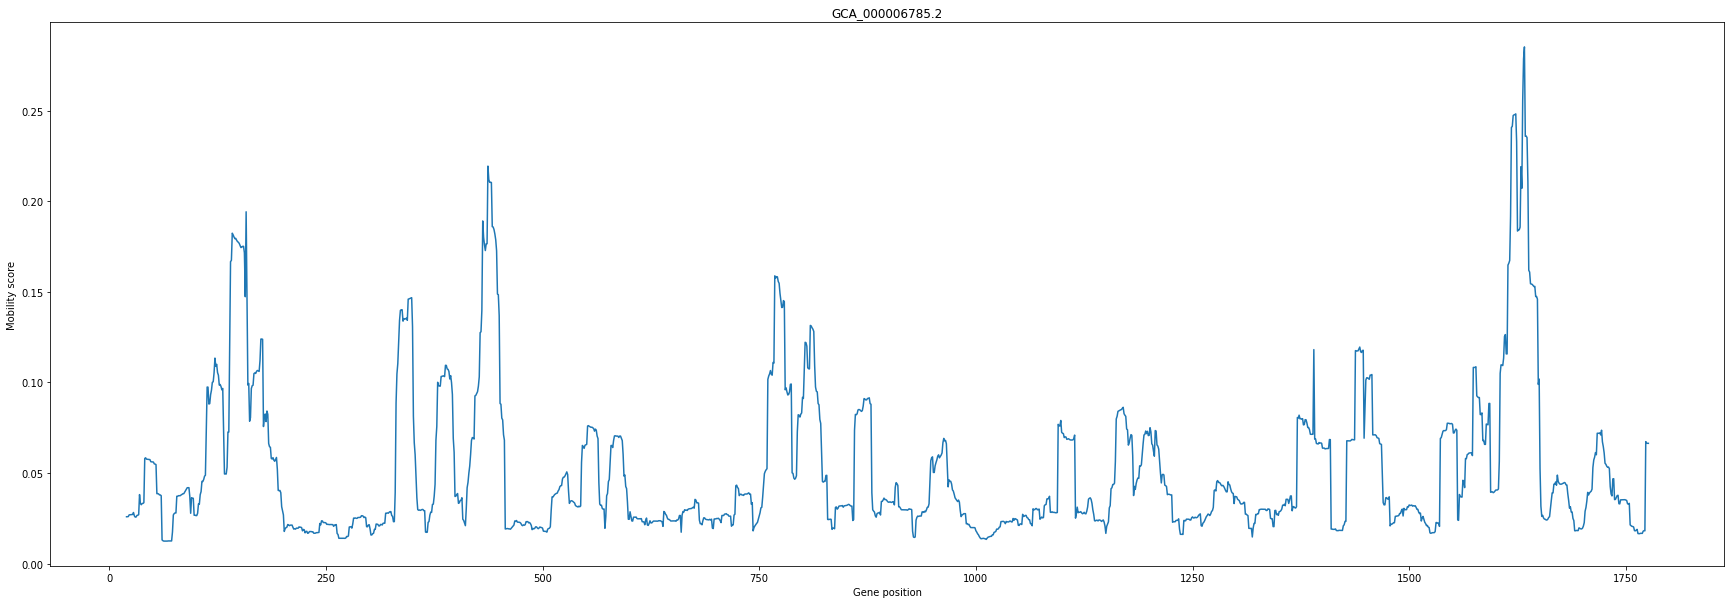

In [16]:
visualize_mobility_score.mobility_plot(genome=genome1, order=full_order, method="species_count", n=20)